<a href="https://colab.research.google.com/github/ShigekiKamata/Learn/blob/main/TensorFlow_Basics_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import numpy as np

import tensorflow as tf

In [126]:
tf.__version__

'2.17.0'

In [127]:
df = pd.read_csv("housing.csv")
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [128]:
print(df.shape)
print(df.dtypes)
df.describe()

(20640, 10)
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [129]:
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']
print(X)
print(y)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16512, 9)
(16512,)
(4128, 9)
(4128,)


In [131]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

oh_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

train_ocean_prox_encoded = oh_encoder.fit_transform(X_train[['ocean_proximity']])
test_ocean_prox_encoded = oh_encoder.transform(X_test[['ocean_proximity']])

# Convert the encoded arrays to DataFrames
train_ocean_prox_encoded_df = pd.DataFrame(train_ocean_prox_encoded, columns=oh_encoder.get_feature_names_out(), index=X_train.index)
test_ocean_prox_encoded_df = pd.DataFrame(test_ocean_prox_encoded, columns=oh_encoder.get_feature_names_out(), index=X_test.index)

X_train = X_train.drop(['ocean_proximity'], axis=1)
X_test = X_test.drop(['ocean_proximity'], axis=1)

X_train = pd.concat([X_train, train_ocean_prox_encoded_df], axis=1)
X_test = pd.concat([X_test, test_ocean_prox_encoded_df], axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train= imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

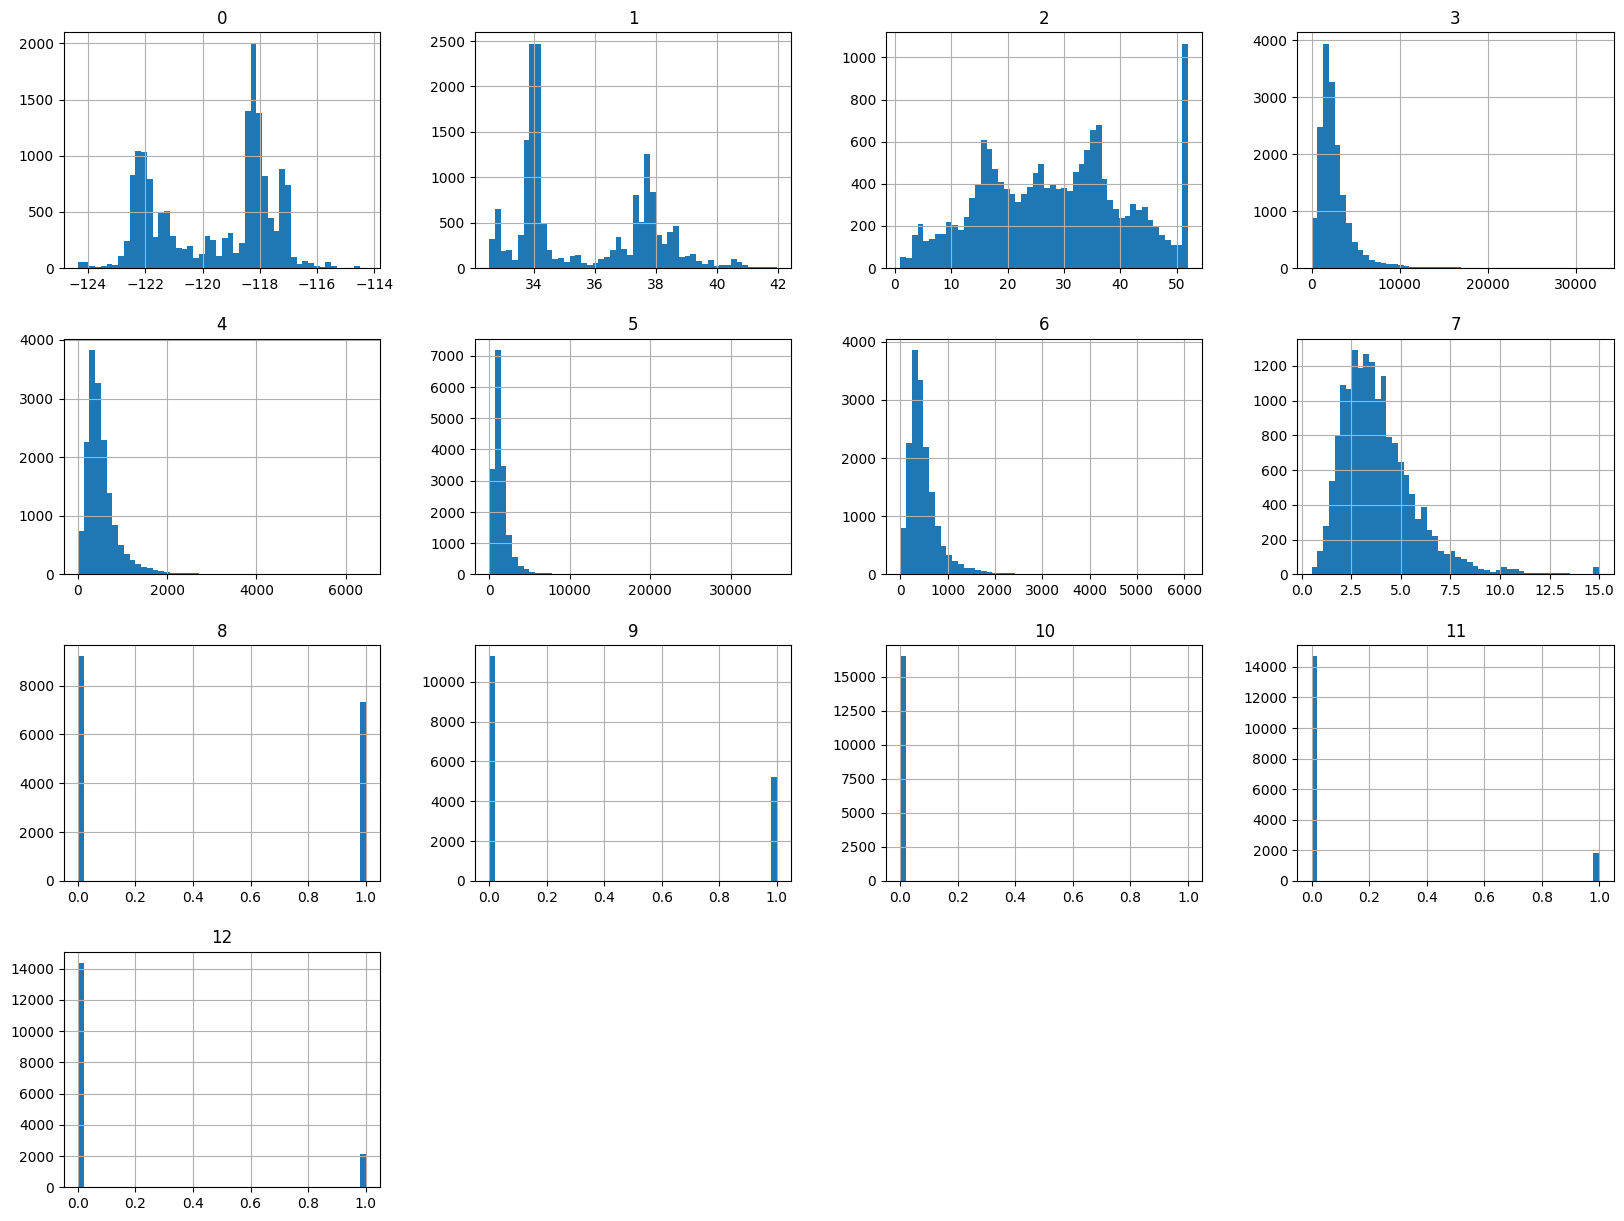

In [132]:
# Inspect data's distribution
import scipy.stats as stats
import matplotlib.pyplot as plt

pd.DataFrame(X_train).hist(bins=50, figsize=(20,15))
plt.show()

In [133]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize data (Careful with data leakage)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [134]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.476792,0.327820,0.541550,0.080863,0.083277,0.039868,0.081953,0.232852,0.442829,0.316558,0.000182,0.110465,0.129966
std,0.199726,0.227051,0.247078,0.067031,0.065225,0.032037,0.062898,0.131500,0.496736,0.465147,0.013478,0.313478,0.336276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.044322,0.045624,0.021918,0.045716,0.142531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.583665,0.181722,0.549020,0.065134,0.067815,0.032596,0.067176,0.210245,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.632470,0.549416,0.705882,0.096460,0.099783,0.048236,0.099326,0.292939,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
print(np.isnan(X_train).sum(), np.isnan(y_train).sum())
print(np.isinf(X_train).sum(), np.isinf(y_train).sum())

0 0
0 0


In [138]:
# ANN skelton
ann = tf.keras.models.Sequential()

# 1st hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
# 2nd hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Last layer (regression)
ann.add(tf.keras.layers.Dense(units=1, activation=None))

# Compile the ANN, optimizer specifies the way of stocastic gradient descent
ann.compile(optimizer='adam', loss ='mean_absolute_error')

In [144]:
# Train model
# epoch: one run through of dataset
# batch_size: size of each subset of dataset when it's devided
# Iteration: run through of a batch, one weight update happens per iteration
# During an iteration, gradients (from ) get averaged for one average gradient fot the batch
# Weight update via backpropagation happens once per batch

history = ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 50567.8047 - val_loss: 51255.4961
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 52215.5000 - val_loss: 51232.0156
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 51279.5312 - val_loss: 51231.7930
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 51270.0273 - val_loss: 51204.3594
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51303.4609 - val_loss: 51190.7227
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 50610.1133 - val_loss: 51182.4766
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 50955.1016 - val_loss: 51167.2656
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51442.4922 - val_loss: 51169.9961
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51620.8242 - val_loss: 51151.4336
Epoch 10/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 51321.3711 - val_loss: 51133.8086


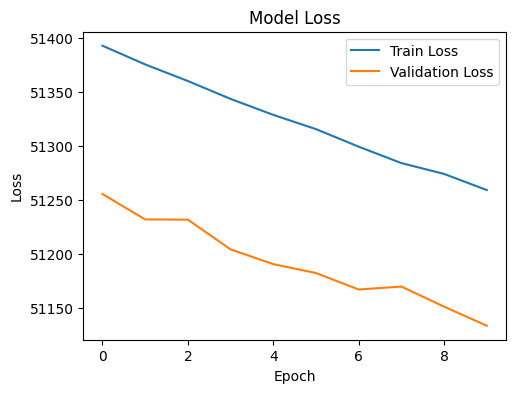

In [145]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [146]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.to_numpy().reshape(len(y_test),1)), axis=1)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[232713.84, 136900.  ],
       [275898.81, 241300.  ],
       [164369.81, 200700.  ],
       ...,
       [111727.47, 128600.  ],
       [224239.5 , 259500.  ],
       [192675.97, 167600.  ]])